### 1. Load the CSV data file into a Pandas DataFrame

In [1]:
# Use Pandas to read in the provided data file
# and review the first 10 rows of data
import pandas as pd

In [2]:
stores_df = pd.read_csv("Stores.csv")

In [3]:
stores_df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


### 2. Report Stores that have more than 100k in Sales

In [4]:
# Use pandas conditional filtering
stores_df[stores_df["Store_Sales"] > 100000]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


### 3. Create a new feature column of ratio between the Sales and the Daily Customer Count of a store

Create a new column called "Average_Purchase" that store the ratio between Store Sales vs. Daily Customer Count

In [5]:
stores_df["Average_Purchase"] = stores_df["Store_Sales"] / stores_df["Daily_Customer_Count"]

In [6]:
stores_df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Average_Purchase
0,1,1659,1961,530,66490,125.452830
1,2,1461,1752,210,39820,189.619048
2,3,1340,1609,720,54010,75.013889
3,4,1451,1748,620,53730,86.661290
4,5,1770,2111,450,46620,103.600000
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,61.472222
892,893,1387,1663,850,82080,96.564706
893,894,1200,1436,1060,76440,72.113208
894,895,1299,1560,770,96610,125.467532


### 4. Create a Visual Report of Sales using a Histogram

In order to understand the distribution of sales across all the stores, create a Histogram of the Sales column using Matplotlib. 

Text(0, 0.5, 'Frequency')

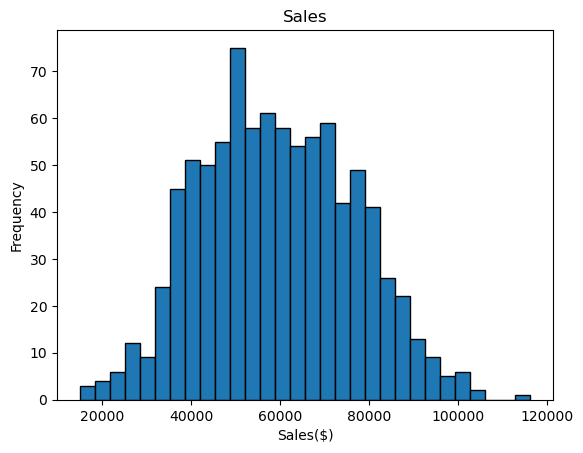

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(stores_df["Store_Sales"],bins = 30, edgecolor="black")
plt.title("Sales")
plt.xlabel("Sales($)")
plt.ylabel("Frequency")

### 5. Create Visual Report of Feature Correlation using a Headmap

In order to understand the relationships between features, we can use the Pearson Correlation Coefficient. 
Use Pandas to create a correlation matrix of the columns in the data. 
Then use the seaborn library to visualize these correlation matrix values using a Heatmap.

In [8]:
import seaborn as sns

In [9]:
# Create the Pandas correlation matrix
stores_df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Average_Purchase
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486,-0.031974
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474,-0.002910
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849,-0.003585
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629,-0.338249
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000,0.139546
Average_Purchase,-0.031974,-0.002910,-0.003585,-0.338249,0.139546,1.000000


<Axes: >

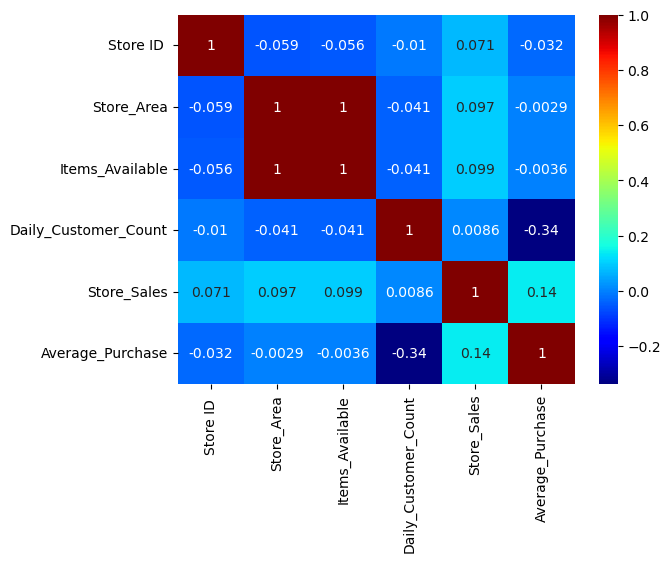

In [10]:
# Pass this matrix into seaborn's heatmap call
sns.heatmap(stores_df.corr(), annot = True, cmap = "jet")

### 6. Create a predictive model in order to help forecast the sales of new stores

Create a label Pandas Series called labels containing the Store Sales values, then create a feature DataFrame called data. Make sure to drop Store ID and Store_Sales from the feature data, since one is a unique identifier and the other is the label we are trying to predict. Split Data into a Training Set and a Test Set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data, labels = stores_df.drop(["Store ID ","Store_Sales"], axis=1), stores_df["Store_Sales"]

In [13]:
data

,Store_Area,Items_Available,Daily_Customer_Count,Average_Purchase
0,1659,1961,530,125.452830
1,1461,1752,210,189.619048
2,1340,1609,720,75.013889
3,1451,1748,620,86.661290
4,1770,2111,450,103.600000
...,...,...,...,...
891,1582,1910,1080,61.472222
892,1387,1663,850,96.564706
893,1200,1436,1060,72.113208
894,1299,1560,770,125.467532


In [14]:
labels

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [16]:
X_train,X_test

(     Store_Area  Items_Available  Daily_Customer_Count  Average_Purchase
 703        1791             2167                   700         91.885714
 740        1336             1616                   710        122.000000
 532        1642             1981                   720         75.625000
 842        1305             1557                   580         95.689655
 402        1439             1724                   900         56.577778
 ..          ...              ...                   ...               ...
 835        1651             2009                  1000         58.160000
 192        1462             1770                  1070         63.280374
 629        1887             2264                   830         74.759036
 559        1237             1512                  1070         82.439252
 684        1540             1820                   310        265.774194
 
 [716 rows x 4 columns],
      Store_Area  Items_Available  Daily_Customer_Count  Average_Purchase
 145       

In [17]:
y_train,y_test

(703    64320
 740    86620
 532    54450
 842    55500
 402    50920
        ...  
 835    58160
 192    67710
 629    62050
 559    88210
 684    82390
 Name: Store_Sales, Length: 716, dtype: int64,
 145    51190
 60     71300
 733    65660
 31     14920
 506    64010
        ...  
 635    44730
 308    74320
 384    48120
 895    54340
 1      39820
 Name: Store_Sales, Length: 180, dtype: int64)

### 7. Create a Linear Regression Model to Forecast Sales Column

In [18]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [19]:
#fit the Linear Regression model on training data
linear_regression.fit(X_train, y_train)

LinearRegression()

### 8. Evaluate Forecast Result using Regression Metrics

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
preds = linear_regression.predict(X_test)

In [22]:
mean_squared_error(preds, y_test)**0.5

16259.056692045066